# Fish Species Classification with Artificial Neural Networks (ANN)

This project aims to classify various species of fish using a deep learning approach based on an Artificial Neural Network (ANN) architecture. We used a dataset consisting of multiple fish images belonging to different species, and the main goal was to accurately predict the species of fish from the given images. In this dataset, **9,000 fish images** were utilized.

## Key Features of the Project:
- **Data Preprocessing**: The images were preprocessed, normalized, and resized to ensure consistent input size for the model.
- **Model Architecture**: The ANN model consists of multiple fully connected Dense layers with activation functions and dropout layers to prevent overfitting.
- **Model Training**: The model was trained using the Adam optimizer with categorical cross-entropy as the loss function.
- **Performance Metrics**: Accuracy, loss, precision, recall, F1-score, and confusion matrix were calculated to evaluate the model's performance on both the training and test sets.
- **Hyperparameter Tuning**: Various hyperparameters such as learning rate, batch size, and number of neurons were optimized to achieve the best results.


In [1]:
!pip install tensorflow==2.16.1

In [2]:
# Installing the required libraries

import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tqdm import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from PIL import Image, UnidentifiedImageError  # UnidentifiedImageError ekleniyor

# Hiding warnings
import warnings
warnings.filterwarnings("ignore")

# Loading the Dataset

In this section, the code loads the fish dataset from a specified directory in Kaggle. It defines the dataset path and retrieves the names of the subfolders, representing different fish classes. The code also initializes lists to store image paths and their corresponding labels, preparing for further data processing.

In [4]:
fish_dir = '/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset'

# Get the names of subfolders in the directory
classes = [i for i in os.listdir(fish_dir) if '.' not in i]
classes

['Hourse Mackerel',
 'Black Sea Sprat',
 'Sea Bass',
 'Red Mullet',
 'Trout',
 'Striped Red Mullet',
 'Shrimp',
 'Gilt-Head Bream',
 'Red Sea Bream']

 # Creating Image and Label Paths

This section of the code initializes empty lists to store image paths and their corresponding labels. It then traverses the specified directory to gather all PNG images while excluding those from the 'GT' folder. For each image, the code appends the corresponding label, which is derived from the folder name, and constructs the complete path to the image file for later processing.

In [5]:
# Create paths for images and labels
labels = []  # Initialize an empty list
paths = []  # Initialize an empty list

# Collect all images and labels
for dir_name, _, filenames in os.walk(fish_dir):
    for filename in filenames:
        if os.path.splitext(filename)[-1] == '.png':  # If the file is a .png
            if 'GT' not in dir_name.split('/')[-1]:  # Exclude 'GT' folder
                labels.append(os.path.split(dir_name)[-1])  # Add the folder name to labels
                img_path = os.path.join(dir_name, filename)
                paths.append(img_path)  # Add the image path


In [6]:
#  Create DataFrame oluştur
data = pd.DataFrame({'path': paths, 'label': labels})

In [7]:
# Check the size of the DataFrame
print(f"DataFrame boyutu: {data.shape}")
print(data.head())


DataFrame boyutu: (9000, 2)
                                                path            label
0  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
1  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
2  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
3  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
4  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel


In [8]:
data.tail()

,path,label
8995,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
8996,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
8997,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
8998,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
8999,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream


In [9]:
data.head()

,path,label
0,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
1,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
2,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
3,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
4,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    9000 non-null   object
 1   label   9000 non-null   object
dtypes: object(2)
memory usage: 140.8+ KB


# Data Analysis


In [11]:
#Check the number of samples for each class
class_counts = data['label'].value_counts()
print(class_counts)

label
Hourse Mackerel       1000
Black Sea Sprat       1000
Sea Bass              1000
Red Mullet            1000
Trout                 1000
Striped Red Mullet    1000
Shrimp                1000
Gilt-Head Bream       1000
Red Sea Bream         1000
Name: count, dtype: int64


In [12]:
# Check the total number of samples
total_samples = len(data)
print(f"The total number of samples: {total_samples}")

The total number of samples: 9000


### Sample Images from Each Class

This code visualizes a sample of images from each class in the dataset. It creates a 3x3 grid of subplots, displaying one image per unique label.
The images are read from the file paths stored in the DataFrame, and each subplot is labeled with the corresponding class name. The axis labels are turned off for better visualization.

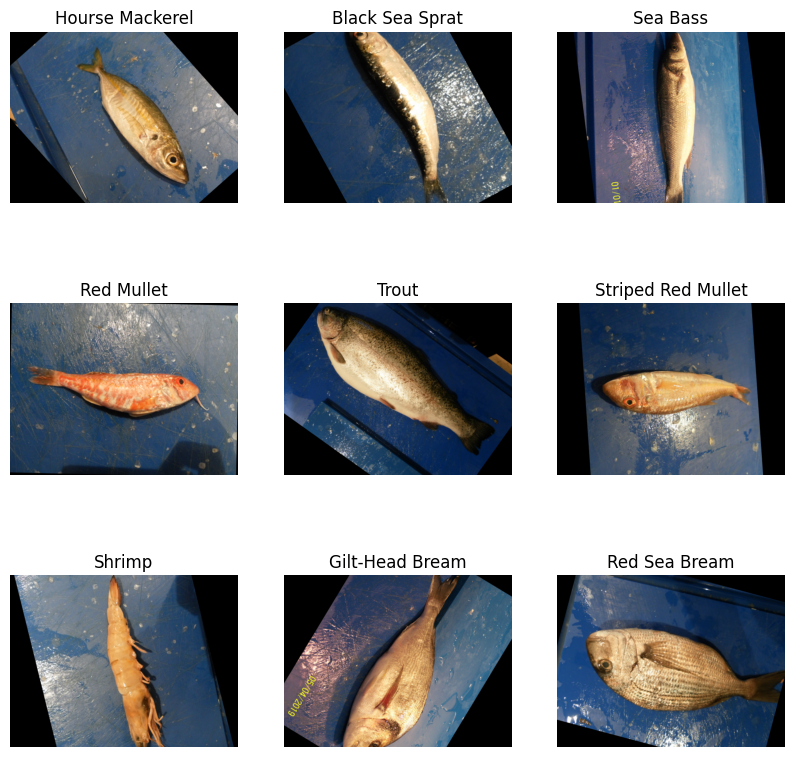

In [13]:
cn = 0
plt.figure(figsize=(10,10))
for unique_label in data['label'].unique():
    plt.subplot(3, 3, cn+1)
    plt.imshow(plt.imread(data[data['label']==unique_label].iloc[0,0]))
    plt.title(unique_label)
    plt.axis('off')
    cn+=1

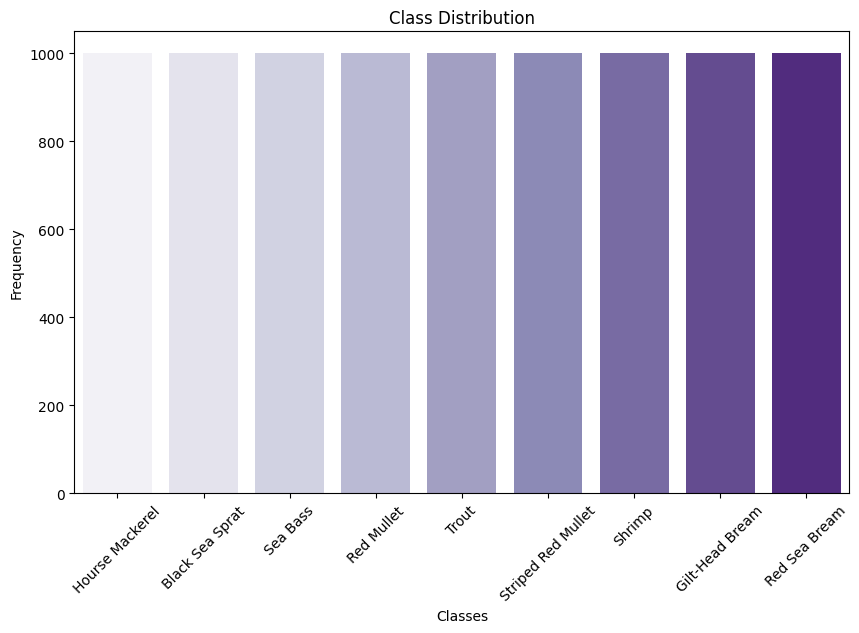

In [14]:
# Calculate Class Distribution
label_counts = data['label'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='Purples')  # Use 'Purples' palette for purple shades

# Chart formatting
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate if class names are long
plt.show()


# Splitting the Data into Training and Test Sets

In this section, the dataset is divided into training, validation, and test sets. First, the entire dataset is split into training and test sets, with 20% of the data allocated for testing. The random state is set for reproducibility, and the class distribution is preserved during the split. Afterward, the training set is further divided into training and validation sets, again allocating 20% of the training data for validation while preserving the class distribution. Finally, the sizes of the training, validation, and test sets are printed to verify the split.

In [15]:
# First, split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data['path'],  # All data paths
    data['label'],  # All labels
    test_size=0.2,  # Test set is 20%
    random_state=42,  # For reproducibility
    stratify=data['label']  # Preserve class distribution
)

# Next, split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train,  # Training set
    y_train,  # Training labels
    test_size=0.2,  # 20% of the training set is the validation set
    random_state=42,  # For reproducibility
    stratify=y_train  # Preserve class distribution
)

# Check the sizes of the sets
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 5760
Validation set size: 1440
Test set size: 1800


In [16]:
print(f"Size of X_test: {len(X_test)}")
print(f"Size of y_test: {len(y_test)}")


Size of X_test: 1800
Size of y_test: 1800


## Checking the Class Distribution of Training and Validation Sets
This section of the code prints the class distributions for both the training set (y_train) and the validation set (y_val). The value_counts() function is used to count the occurrences of each class label in the respective datasets.

We use this to ensure that the class distributions are balanced and that the split did not introduce any bias. Checking the class distribution is crucial for understanding the representation of each class in both the training and validation sets, which can impact the model's performance and generalization ability.

In [17]:
print("Class distribution of the training set:")
print(y_train.value_counts())

print("Class distribution of the validation set:")
print(y_val.value_counts())


Class distribution of the training set:
label
Black Sea Sprat       640
Trout                 640
Striped Red Mullet    640
Sea Bass              640
Hourse Mackerel       640
Red Mullet            640
Red Sea Bream         640
Shrimp                640
Gilt-Head Bream       640
Name: count, dtype: int64
Class distribution of the validation set:
label
Red Sea Bream         160
Hourse Mackerel       160
Trout                 160
Striped Red Mullet    160
Black Sea Sprat       160
Red Mullet            160
Shrimp                160
Sea Bass              160
Gilt-Head Bream       160
Name: count, dtype: int64


In [18]:
print(y_train.head())  # Check only the first few labels
print(y_val.head())  # Check only the first few labels


1207       Black Sea Sprat
1015       Black Sea Sprat
4846                 Trout
5635    Striped Red Mullet
2101              Sea Bass
Name: label, dtype: object
8973         Red Sea Bream
379        Hourse Mackerel
4795                 Trout
5770    Striped Red Mullet
1195       Black Sea Sprat
Name: label, dtype: object


## Resizing and Normalization of Images
In this section, we will resize the images to a uniform size of 128x128 pixels and normalize their pixel values. Normalization is essential as it helps in stabilizing the training process and improving the performance of the neural network by ensuring that all input values are within a similar range.

In [20]:
IMG_SIZE = (128, 128)

def preprocess_input(x):
    return x.astype('float32') / 255.0  # Normalization


## One-Hot Encoding
We apply One-Hot Encoding to convert categorical labels into a binary format that can be provided to the neural network. Each class label is transformed into a vector where only the index corresponding to the class is set to 1, while all other indices are set to 0. This encoding is essential for multiclass classification problems, as it allows the model to understand the relationship between the classes better and facilitates learning. In this code, we fit the encoder on the training labels and then transform the validation and test labels accordingly.

In [21]:
# One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_val_encoded = encoder.transform(y_val.values.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))  # Include the test set as well


In [22]:
# Let's visualize the encoded values.
y_train_encoded[:10]


array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

## Data Generators Creation
In this section, we are creating data generators using the ImageDataGenerator class from Keras. The purpose of these generators is to facilitate the efficient loading and preprocessing of images for training and testing our model.

### Training Generator:

We apply the preprocess_input function to normalize the images.
The validation_split parameter allows us to automatically split the training data into training and validation sets, which helps in monitoring the model's performance during training.

### Test Generator:

For the test set, we also use the preprocess_input function to ensure the test images are normalized in the same way as the training images.
However, we do not apply a validation split since the test set is used solely for evaluating the model after training.
Using data generators is crucial for handling large datasets efficiently, as they allow us to load images in batches during training without loading the entire dataset into memory at once.

In [23]:
# Data Generators
train_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

test_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

## Training and Validation Flow Creation

In this section, we create data flows for training, validation, and testing images using the flow_from_dataframe method of the ImageDataGenerator class. This approach allows us to efficiently load and preprocess image data from DataFrames, which contain the file paths and corresponding labels.

### Training Flow:

We construct a DataFrame from X_train and y_train, which contains the paths of the training images and their respective labels.
We specify the target_size to resize images to a consistent dimension (defined by IMG_SIZE).
The color_mode is set to 'rgb' to load images in color.
We use class_mode='categorical' for multi-class classification, which outputs one-hot encoded labels.
The batch_size is set to 32, meaning that images will be processed in batches of 32 during training.
The shuffle parameter is set to True to randomly shuffle the data at the beginning of each epoch, which helps improve model generalization.
We also set a seed for reproducibility.

### Validation Flow:

Similar to the training flow, we create a DataFrame for X_val and y_val.
The key difference is that shuffle is set to False, as we want to maintain the order of the validation data for performance evaluation during training.
Test Flow:

For the test images, we create a DataFrame from X_test and y_test in the same way.
Again, shuffle is set to False to ensure the test data remains in order.
Using data flows allows us to load images on-the-fly during training and testing, which is especially useful when dealing with large datasets that cannot fit into memory all at once. This method also integrates the preprocessing steps defined earlier, ensuring consistency in image handling.

In [24]:
# Eğitim akışı
train_images = train_generator.flow_from_dataframe(
    dataframe=pd.DataFrame({'path': X_train, 'label': y_train}),  # X_train ve y_train'ı kullanarak DataFrame oluştur
    x_col='path',
    y_col='label',
    target_size=IMG_SIZE,  # Resim boyutu
    color_mode='rgb',
    class_mode='categorical',  # Çok sınıflı sınıflandırma
    batch_size=32,
    shuffle=True,
    seed=42,
)

# Doğrulama akışı
val_images = train_generator.flow_from_dataframe(
    dataframe=pd.DataFrame({'path': X_val, 'label': y_val}),  # X_val ve y_val'ı kullanarak DataFrame oluştur
    x_col='path',
    y_col='label',
    target_size=IMG_SIZE,  # Resim boyutu
    color_mode='rgb',
    class_mode='categorical',  # Çok sınıflı sınıflandırma
    batch_size=32,
    shuffle=False,
    seed=42,
)

test_images = test_generator.flow_from_dataframe(
    dataframe=pd.DataFrame({'path': X_test, 'label': y_test}),  # X_test ve y_test'ı kullanarak DataFrame oluştur
    x_col='path',
    y_col='label',
    target_size=IMG_SIZE,  # Resim boyutu
    color_mode='rgb',
    class_mode='categorical',  # Çok sınıflı sınıflandırma
    batch_size=32,
    shuffle=False,
)

Found 5760 validated image filenames belonging to 9 classes.
Found 1440 validated image filenames belonging to 9 classes.
Found 1800 validated image filenames belonging to 9 classes.


## Sample Visualization of Training and Validation Data

we define a function visualize_data that takes an image data generator and the number of images to display as input. The function retrieves a batch of images and their corresponding labels from the generator, and then visualizes them using Matplotlib.

### Function Definition:

The function visualize_data creates a figure with a specified size.
It retrieves the first batch of images and labels using next(generator).
Image Visualization:

A loop iterates over the number of images specified (default is 5).
Each image is displayed in a subplot with its corresponding label as the title.
The axes are turned off for a cleaner look.

### Visualization Calls:

The function is called twice: first to visualize samples from the training set and then from the validation set.
This process helps in understanding the quality and distribution of the data being fed into the model, providing insights into whether the images and labels are correctly aligned.

Sample images from the training set:


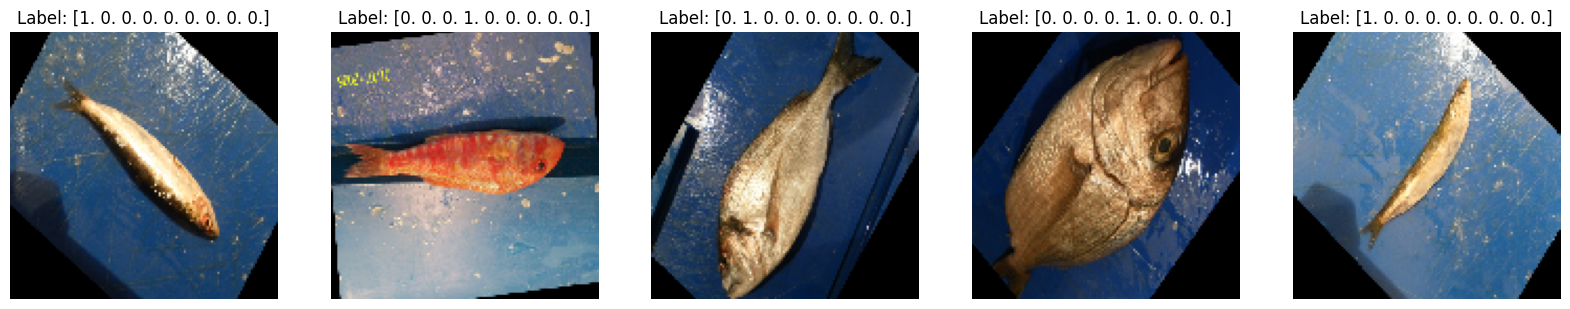

Sample images from the validation set:


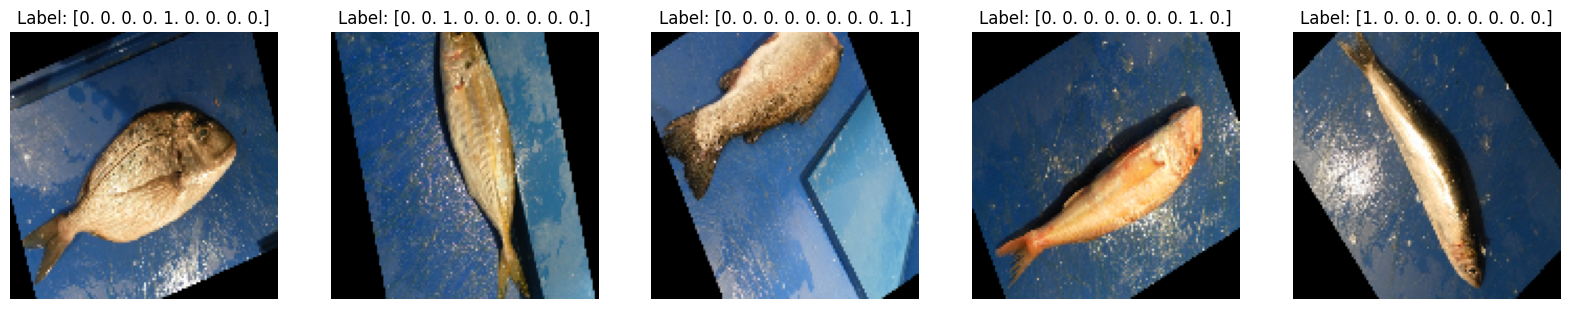

In [25]:
import matplotlib.pyplot as plt

def visualize_data(generator, n=5):
    plt.figure(figsize=(20, 8))
    
    # Get the first batch
    for i in range(1):  # Only getting the first batch
        img, label = next(generator)  # Retrieve the first batch
    
    # Visualize the images
    for j in range(n):
        plt.subplot(1, n, j + 1)
        plt.imshow(img[j])  # Display the image
        plt.title(f"Label: {label[j]}")
        plt.axis('off')
    plt.show()

# Visualize training data
print("Sample images from the training set:")
visualize_data(train_images)

# Visualize validation data
print("Sample images from the validation set:")
visualize_data(val_images)


# Model Creation
In this section, we will create the architecture of the Artificial Neural Network (ANN) model for classifying fish images. We will define the layers of the model, including the input layer, hidden layers with activation functions, dropout layers for regularization, and the output layer with a softmax activation function to handle multi-class classification. After building the model, we will compile it with a suitable optimizer and loss function.

### Model Architecture

The model consists of 5 layers and is designed to classify fish species based on visual data from a dataset of 9,000 images. Below is a detailed explanation of the model's architecture and techniques used to optimize performance:

1. **Input Layer:**
   - **Flatten Layer:** The input layer flattens the images of shape (128, 128, 3) into a 1D vector, preparing the data for the dense layers.

2. **Hidden Layers:**
   - **First Hidden Layer:**
     - **Dense Layer (512 neurons):** This layer serves as the first hidden layer, utilizing a high number of neurons to capture complex patterns in the data.
     - **Batch Normalization:** This layer normalizes the output from the dense layer to stabilize learning and improve convergence speed.
     - **Activation (ReLU):** The ReLU activation function is applied to introduce non-linearity, allowing the model to learn more complex features.
     - **Dropout (0.3):** A dropout rate of 30% is implemented to reduce overfitting by randomly disabling 30% of the neurons during training.

   - **Second Hidden Layer:**
     - **Dense Layer (256 neurons):** This layer continues feature extraction with a moderate number of neurons.
     - **Batch Normalization:** Normalization is again applied to improve training stability.
     - **Activation (ReLU):** The ReLU activation function is used to enhance the model's capability to learn.
     - **Dropout (0.2):** A dropout rate of 20% is used in this layer to further mitigate overfitting.

   - **Third Hidden Layer:**
     - **Dense Layer (128 neurons):** This layer allows the model to learn even more abstract representations.
     - **Batch Normalization:** Applied to normalize the layer outputs.
     - **Activation (ReLU):** Again, ReLU is used for non-linearity.
     - **Dropout (0.2):** A dropout rate of 20% is included to prevent overfitting.

   - **Fourth Hidden Layer:**
     - **Dense Layer (64 neurons):** This layer helps refine the learned features.
     - **Batch Normalization:** Normalization improves the model's robustness.
     - **Activation (ReLU):** ReLU activation maintains the non-linearity.
     - **Dropout (0.1):** A lower dropout rate of 10% is applied in this layer to retain more information as the model becomes more refined.

   - **Fifth Hidden Layer:**
     - **Dense Layer (64 neurons):** This layer further processes the features learned from the previous layers.

3. **Output Layer:**
   - **Dense Layer (n classes, softmax):** The final output layer uses the softmax activation function to provide a probability distribution across the target classes, where `n` is the number of distinct fish species.

### Model Training
The model is compiled using the Adam optimizer with categorical crossentropy as the loss function, which is appropriate for multi-class classification tasks. The accuracy metric is used to evaluate the model's performance.

### Dataset
The model is trained on a dataset consisting of **9,000 images**, covering various fish species, ensuring a robust foundation for training and evaluation.


In [29]:
# Initialize the model
model = tf.keras.models.Sequential()

# Input layer
model.add(tf.keras.layers.Flatten(input_shape=(128, 128, 3)))  # Flattens the images into a 1D vector

# Hidden layers
model.add(tf.keras.layers.Dense(512))  # First hidden layer
model.add(tf.keras.layers.BatchNormalization())  # Normalization
model.add(tf.keras.layers.Activation('relu'))  # Activation
model.add(tf.keras.layers.Dropout(0.3))  # Dropout

model.add(tf.keras.layers.Dense(256))  # Second hidden layer
model.add(tf.keras.layers.BatchNormalization())  # Normalization
model.add(tf.keras.layers.Activation('relu'))  # Activation
model.add(tf.keras.layers.Dropout(0.2))  # Dropout

model.add(tf.keras.layers.Dense(128))  # Third hidden layer
model.add(tf.keras.layers.BatchNormalization())  # Normalization
model.add(tf.keras.layers.Activation('relu'))  # Activation
model.add(tf.keras.layers.Dropout(0.2))  # Dropout

model.add(tf.keras.layers.Dense(64)) # fourth hidden layer
model.add(tf.keras.layers.BatchNormalization()) # Normalization
model.add(tf.keras.layers.Activation('relu'))  # Activation
model.add(tf.keras.layers.Dropout(0.1))  # Dropout

model.add(tf.keras.layers.Dense(64))


# Output layer
model.add(tf.keras.layers.Dense(len(classes), activation='softmax'))  # Output based on the number of classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │    25,166,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,347,401 (96.69 MB)

 Trainable params: 25,345,481 (96.69 MB)

 Non-trainable params: 1,920 (7.50 KB)

# Early Stopping and Learning Rate Scheduler

In this section, we implement two important callbacks for training our neural network model: **Early Stopping** and **Learning Rate Scheduler**.

1. **Early Stopping**:
   - The `EarlyStopping` callback is used to prevent overfitting by monitoring the validation loss (`val_loss`). 
   - The parameter `patience=5` means that if the validation loss does not improve for 5 consecutive epochs, the training will stop. This allows us to halt training when the model's performance on the validation set begins to degrade.
   - The `restore_best_weights=True` option ensures that the model will revert to the best weights observed during training, based on the monitored metric (in this case, `val_loss`). This helps maintain the best version of the model for future predictions.

2. **Learning Rate Scheduler**:
   - The `LearningRateScheduler` callback adjusts the learning rate dynamically during training, which can help improve convergence and overall model performance.
   - The function `lr_schedule(epoch)` defines the learning rate based on the current epoch. In this case, it starts at `0.001` and decreases the learning rate by a factor of `0.1` every 10 epochs. This gradual reduction helps the model settle into a local minimum more effectively as training progresses, allowing for finer adjustments to weights in the later stages of training.


In [31]:
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
# EarlyStopping ve LearningRateScheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

def lr_schedule(epoch):
    return 0.001 * (0.1 ** (epoch // 10))

lr_scheduler = LearningRateScheduler(lr_schedule)



# Training the Model
In this section, we train our neural network model using the fit method. The model learns from the training dataset (train_images) while simultaneously validating its performance on the validation dataset (val_images). We set the number of epochs to 30, indicating that the model will iterate through the training dataset 30 times. The batch size is set to 32, meaning that the model will update its weights after processing 32 samples.

We also incorporate two callbacks: EarlyStopping and LearningRateScheduler. The EarlyStopping callback monitors the validation loss and stops training if it doesn't improve for 5 consecutive epochs, preventing overfitting. The LearningRateScheduler adjusts the learning rate according to a predefined schedule, helping the model to converge more effectively during training. This combination of strategies helps optimize the training process and enhance the model's performance.








In [32]:
# Train the model
history = model.fit(
    train_images,  # Training data
    validation_data=val_images,  # Validation data
    epochs=30,  # Number of epochs for training
    batch_size=32,  # Batch size
    callbacks=[early_stopping, lr_scheduler]  # Callbacks
)


Epoch 1/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 78s 367ms/step - accuracy: 0.3069 - loss: 1.9119 - val_accuracy: 0.3569 - val_loss: 2.0173 - learning_rate: 0.0010
Epoch 2/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 67s 359ms/step - accuracy: 0.5992 - loss: 1.1426 - val_accuracy: 0.4069 - val_loss: 2.0192 - learning_rate: 0.0010
Epoch 3/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 67s 362ms/step - accuracy: 0.7523 - loss: 0.7409 - val_accuracy: 0.5854 - val_loss: 1.2822 - learning_rate: 0.0010
Epoch 4/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 69s 371ms/step - accuracy: 0.8205 - loss: 0.5470 - val_accuracy: 0.7833 - val_loss: 0.6019 - learning_rate: 0.0010
Epoch 5/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 69s 372ms/step - accuracy: 0.8634 - loss: 0.4131 - val_accuracy: 0.8174 - val_loss: 0.5913 - learning_rate: 0.0010
Epoch 6/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 67s 362ms/step - accuracy: 0.8915 - loss: 0.3301 - val_accuracy: 0.8535 - val_loss: 0.4293 - learning_rate: 0.0010
Epoch 7/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 67s 362ms/step - accuracy: 0.8

## Evaluating the Model

In [33]:
# Let's evaluate the model's performance on the test set
loss, accuracy = model.evaluate(test_images)  # Evaluate the model on the test images
print(f"Test loss: {loss}, Test accuracy: {accuracy}")  # Print the test loss and accuracy

# Make predictions
y_pred = model.predict(test_images)  # Predict the classes for the test images
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the predicted class labels


57/57 ━━━━━━━━━━━━━━━━━━━━ 27s 469ms/step - accuracy: 0.9764 - loss: 0.0648
Test loss: 0.07540486752986908, Test accuracy: 0.972777783870697
57/57 ━━━━━━━━━━━━━━━━━━━━ 17s 300ms/step


## Visualizing the Results
In this section, we visualize the training process by plotting the loss and accuracy graphs.

### Loss Graph:
This graph shows the training and validation loss over epochs. A decreasing loss indicates that the model is improving in its ability to minimize errors during training and validation.

### Accuracy Graph:
This graph displays the training and validation accuracy over epochs. An increasing accuracy indicates that the model is correctly classifying more instances in both the training and validation datasets.

These visualizations help us to monitor the performance of the model throughout the training process and to identify potential issues such as overfitting.

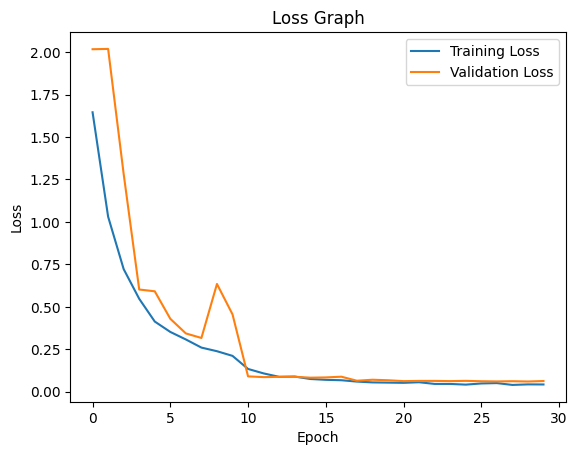

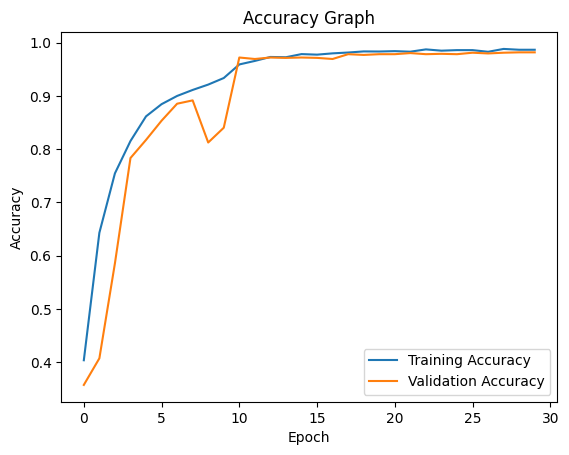

In [34]:
# Loss Graph
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Graph')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Accuracy Graph
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


### Conversion of `y_test` to NumPy Array

We convert `y_test` to a NumPy array for several important reasons:

1. **Compatibility**: 
   Many machine learning libraries and functions, including those in TensorFlow and NumPy, expect data in the form of NumPy arrays. This ensures that our data can be easily utilized with various functions and operations.

2. **Performance**: 
   NumPy arrays are more efficient in terms of memory usage and computational speed compared to Python lists. They enable faster data manipulation and are optimized for numerical computations, which is crucial in machine learning tasks.

3. **Convenience**: 
   Using NumPy arrays simplifies the process of performing mathematical operations, slicing, and reshaping. This is particularly important during the evaluation phase of our model, where we may need to compare predicted values against actual labels.

By converting `y_test` to a NumPy array, we ensure that our labels are in a suitable format for model evaluation and further analysis.


In [36]:
# Convert y_test to a NumPy array
y_test_np = np.array(y_test)


In [37]:
# Let's display the probabilities of the first predicted value.
y_pred[0]


array([1.1999969e-11, 7.4290256e-08, 1.9081419e-09, 5.7463563e-09,
       9.9999726e-01, 5.1435296e-09, 1.9311546e-08, 9.5217715e-08,
       2.5578447e-06], dtype=float32)

In [38]:
np.set_printoptions(suppress = True)

print(y_pred[0])

[0.         0.00000007 0.         0.00000001 0.99999726 0.00000001
 0.00000002 0.0000001  0.00000256]


In [39]:
# Display the true value of the first entry
print(y_test[0])

# Print the index of the highest probability in the first prediction
print(np.argmax(y_test[0]))


Hourse Mackerel
0


In [40]:
# Let's visualize the first 10 prediction values.
y_pred_classes[:10]


array([4, 8, 6, 8, 1, 5, 7, 2, 5, 2])

## Check the Encoding of Labels
First, check the data types of variables like y_train, y_val, and y_test. If they are of string type, you should convert them to numerical values using LabelEncoder.

In this code snippet, we use the LabelEncoder from the sklearn.preprocessing module to convert categorical labels into numerical values. This is done because many machine learning algorithms require numerical input.

LabelEncoder(): This initializes a new instance of the label encoder.
fit_transform(y_train): This method fits the encoder to the training labels (y_train) and transforms them into numerical values simultaneously.
transform(y_val) and transform(y_test): These methods apply the same transformation to the validation (y_val) and test (y_test) labels, ensuring consistency across all datasets.
By encoding the labels, we prepare them for input into the neural network, facilitating the training and evaluation process

In [41]:
from sklearn.preprocessing import LabelEncoder

# Convert labels to numerical values
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_val_encoded = encoder.transform(y_val)
y_test_encoded = encoder.transform(y_test)


## Model Predictions Encoding
In this section, we ensure that the model's predictions are encoded correctly to match the format of the training and test labels. Proper encoding is crucial for accurately interpreting the model's outputs and comparing them against the actual labels.

In [42]:
# Model predictions
y_pred = model.predict(val_images)  # or test_images
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with the highest probability


45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 294ms/step


In [43]:
print(f"y_test_encoded shape: {len(y_test_encoded)}")
print(f"y_pred_classes shape: {len(y_pred_classes)}")


y_test_encoded shape: 1800
y_pred_classes shape: 1440


In [ ]:
print(f"Number of test images: {len(test_images)}")


In [50]:
# Model predictions
y_pred = model.predict(val_images)  # or test_images
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with the highest probability

# Check sizes
print(f"y_test_encoded size: {len(y_val)}")  # True labels
print(f"y_pred_classes size: {len(y_pred_classes)}")  # Predictions

# Convert true labels to numerical format
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_val_encoded = label_encoder.fit_transform(y_val)

# Check sizes
print(f"y_val_encoded size: {len(y_val_encoded)}")  


45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 295ms/step
y_test_encoded size: 1440
y_pred_classes size: 1440
y_val_encoded size: 1440


# Visualization of Incorrect Predictions

In this section, we aim to visualize the incorrect predictions made by our model on the validation dataset. By examining these errors, we can gain insights into the model's performance and identify patterns or classes that may require further improvement. 

The code retrieves indices of incorrectly classified images and displays one such image alongside a bar chart of the predicted probabilities for each class. This visualization helps us understand not only which class the model predicted incorrectly but also how confident the model was in its prediction. By analyzing these instances, we can refine our model, adjust the training process, or collect more data for specific classes to enhance overall performance.


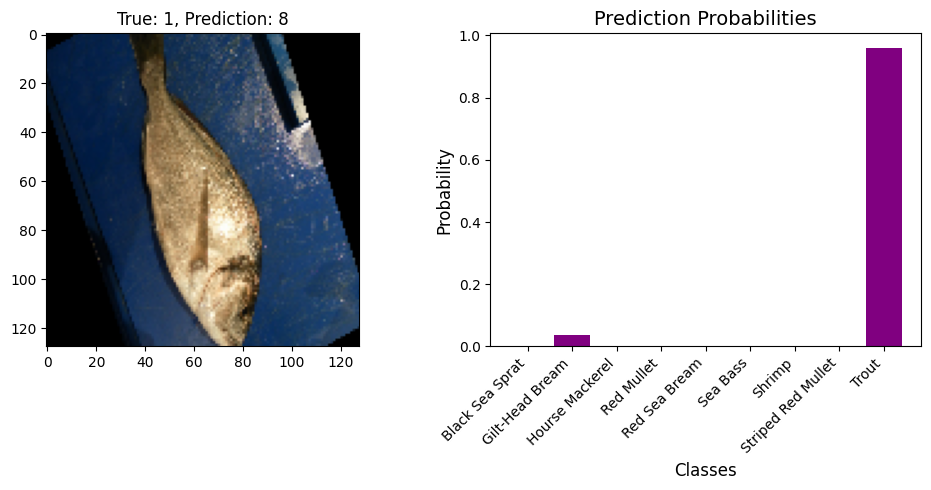

In [65]:
# Get indices for incorrect predictions
ix = np.where(y_val_encoded != y_pred_classes)[0]

# k value for showing one of the incorrect predictions
k = 0  # You can change this value as desired
if k < len(ix):  # Check the bounds for k
    plt.figure(figsize=(10, 5))
    
    # Show the image for the incorrect prediction
    plt.subplot(1, 2, 1)

    # Get a batch from the DataFrameIterator
    val_images_batch, _ = next(val_images)  # Get the images and labels
    
    # Pull the correct image for the incorrect prediction
    image_to_show = val_images_batch[ix[k]]  # The image where the incorrect prediction was found

    # Reshape the image
    if image_to_show.ndim == 3:  # If it's a color image (e.g., RGB)
        plt.imshow(image_to_show)  # Display the image directly
    else:  # If it's a grayscale image
        plt.imshow(image_to_show.reshape(28, 28), cmap="gray")  # Show the image
    plt.title(f"True: {y_val_encoded[ix[k]]}, Prediction: {y_pred_classes[ix[k]]}")

    plt.subplot(1, 2, 2)
    plt.bar(np.arange(len(np.unique(y_val_encoded))), y_pred[ix[k]], color='purple')  # Prediction probabilities
    plt.xticks(np.arange(len(np.unique(y_val_encoded))), label_encoder.classes_, rotation=45, ha="right")  # Class names
    plt.title("Prediction Probabilities", fontsize=14)
    plt.xlabel("Classes", fontsize=12)
    plt.ylabel("Probability", fontsize=12)

    plt.tight_layout()
    plt.show()
else:
    print("The specified 'k' value is greater than the number of incorrect predictions.")


## Confusion Matrix Visualization
The confusion matrix is a valuable tool for evaluating the performance of a classification model. It provides a clear overview of how well the model is predicting each class by displaying the true positives, true negatives, false positives, and false negatives. By visualizing the confusion matrix, we can easily identify which classes are being misclassified, allowing us to understand the model's strengths and weaknesses. This insight helps us make informed decisions about potential improvements and adjustments needed in the model or the data.



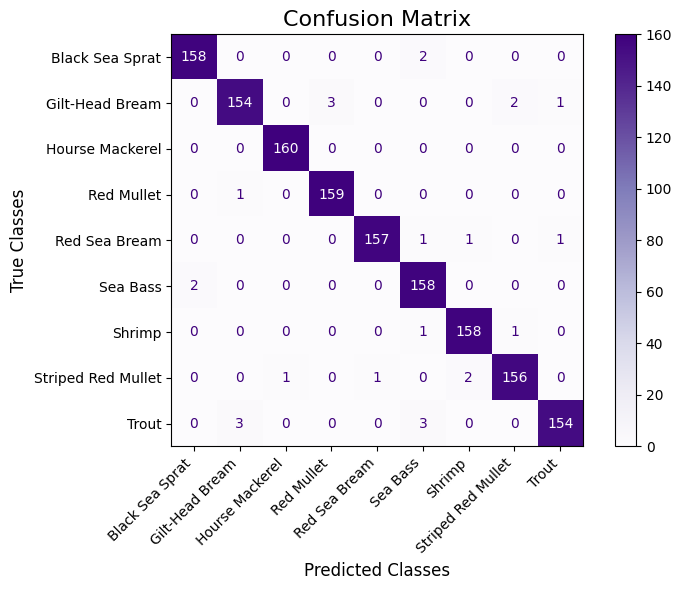

In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate the confusion matrix
cm = confusion_matrix(y_val_encoded, y_pred_classes)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))  # Smaller figure size
cmd = ConfusionMatrixDisplay(cm, display_labels=label_encoder.classes_)
cmd.plot(cmap='Purples', ax=plt.gca())  # Change to purple color map
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Classes", fontsize=12)
plt.ylabel("True Classes", fontsize=12)
plt.tight_layout()  # Adjust layout for better visibility of labels
plt.show()


## Generating a Classification Report

This code snippet utilizes the classification_report function from sklearn.metrics to assess the model's performance. It generates important metrics, including precision, recall, F1-score, and support for each class. By comparing the true labels (y_val_encoded) with the predicted class labels (y_pred_classes), the report is created. The target_names parameter is used to map numerical labels to their corresponding class names, making the output more interpretable.



In [45]:
from sklearn.metrics import classification_report

# Calculate the classification report
report = classification_report(y_val_encoded, y_pred_classes, target_names=label_encoder.classes_)
print(report)


                    precision    recall  f1-score   support

   Black Sea Sprat       0.99      0.99      0.99       160
   Gilt-Head Bream       0.97      0.96      0.97       160
   Hourse Mackerel       0.99      1.00      1.00       160
        Red Mullet       0.98      0.99      0.99       160
     Red Sea Bream       0.99      0.98      0.99       160
          Sea Bass       0.96      0.99      0.97       160
            Shrimp       0.98      0.99      0.98       160
Striped Red Mullet       0.98      0.97      0.98       160
             Trout       0.99      0.96      0.97       160

          accuracy                           0.98      1440
         macro avg       0.98      0.98      0.98      1440
      weighted avg       0.98      0.98      0.98      1440

